In [103]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
#from summarytools import dfSummary # dfSummary(df_online_retail) - Alternative way of displaying df summary  
#import sidetable

In [32]:
# Reading Data
df_online_retail = pd.read_csv('../00_Data/data.csv', encoding= 'unicode_escape')
df_online_retail_xlsx = pd.read_excel('../00_Data/online_retail.xlsx', sheet_name=0)
df_online_retail_II = pd.read_excel('../00_Data/online_retail.xlsx', sheet_name=0)
df_rec_sys_order = pd.read_excel('../00_Data/Rec_sys_data.xlsx', sheet_name=0)
df_rec_sys_customer = pd.read_excel('../00_Data/Rec_sys_data.xlsx', sheet_name=1)
df_rec_sys_product = pd.read_excel('../00_Data/Rec_sys_data.xlsx', sheet_name=2)

In [42]:
print("Nr of Transactions Online Retail Dataset: \t", df_online_retail.shape[0])
print("Nr of Transactions Rec Sys Dataset: \t\t", df_rec_sys_order.shape[0])

Nr of Transactions Online Retail Dataset: 	 541909
Nr of Transactions Rec Sys Dataset: 		 272404


In [46]:
df_online_retail['CustomerID'].nunique()

4372

In [48]:
df_rec_sys_order['CustomerID'].nunique()

3647

In [66]:
df_rec_sys_order.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,DeliveryDate,Discount%,ShipMode,ShippingCost,CustomerID
0,536365,84029E,6,2010-12-01 08:26:00,2010-12-02 08:26:00,0.20,ExpressAir,30.12,17850
1,536365,71053,6,2010-12-01 08:26:00,2010-12-02 08:26:00,0.21,ExpressAir,30.12,17850
2,536365,21730,6,2010-12-01 08:26:00,2010-12-03 08:26:00,0.56,Regular Air,15.22,17850
3,536365,84406B,8,2010-12-01 08:26:00,2010-12-03 08:26:00,0.30,Regular Air,15.22,17850
4,536365,22752,2,2010-12-01 08:26:00,2010-12-04 08:26:00,0.57,Delivery Truck,5.81,17850


In [133]:
df = df_rec_sys_order.merge(df_rec_sys_product, on='StockCode')

In [134]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,DeliveryDate,Discount%,ShipMode,ShippingCost,CustomerID,Product Name,Description,Category,Brand,Unit Price
0,536365,84029E,6,2010-12-01 08:26:00,2010-12-02 08:26:00,0.20,ExpressAir,30.12,17850,"3 1/2""W x 20""D x 20""H Funston Craftsman Smooth...",Our Rustic Collection is an instant classic. O...,Home Improvement|Hardware|Brackets and Angle I...,Ekena Milwork,199.11
1,536373,84029E,6,2010-12-01 09:02:00,2010-12-02 09:02:00,0.55,ExpressAir,30.12,17850,"3 1/2""W x 20""D x 20""H Funston Craftsman Smooth...",Our Rustic Collection is an instant classic. O...,Home Improvement|Hardware|Brackets and Angle I...,Ekena Milwork,199.11
2,536375,84029E,6,2010-12-01 09:32:00,2010-12-03 09:32:00,0.18,Regular Air,15.22,17850,"3 1/2""W x 20""D x 20""H Funston Craftsman Smooth...",Our Rustic Collection is an instant classic. O...,Home Improvement|Hardware|Brackets and Angle I...,Ekena Milwork,199.11
3,536396,84029E,6,2010-12-01 10:51:00,2010-12-02 10:51:00,0.06,ExpressAir,30.12,17850,"3 1/2""W x 20""D x 20""H Funston Craftsman Smooth...",Our Rustic Collection is an instant classic. O...,Home Improvement|Hardware|Brackets and Angle I...,Ekena Milwork,199.11
4,536406,84029E,6,2010-12-01 11:33:00,2010-12-03 11:33:00,0.42,Regular Air,15.22,17850,"3 1/2""W x 20""D x 20""H Funston Craftsman Smooth...",Our Rustic Collection is an instant classic. O...,Home Improvement|Hardware|Brackets and Angle I...,Ekena Milwork,199.11


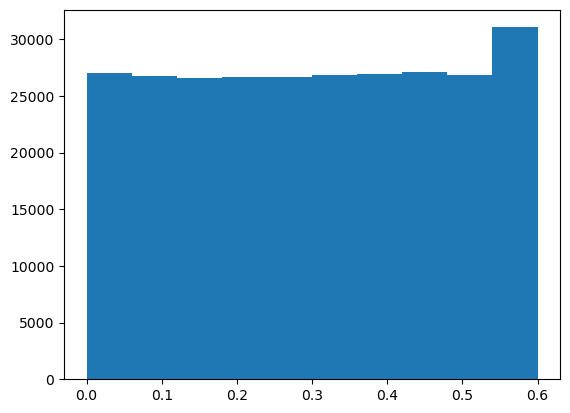

In [132]:
plt.hist(df_rec_sys_order['Discount%'], bins=10)
plt.show()

In [107]:
df_rec_sys_order['Quantity'].max()

74215

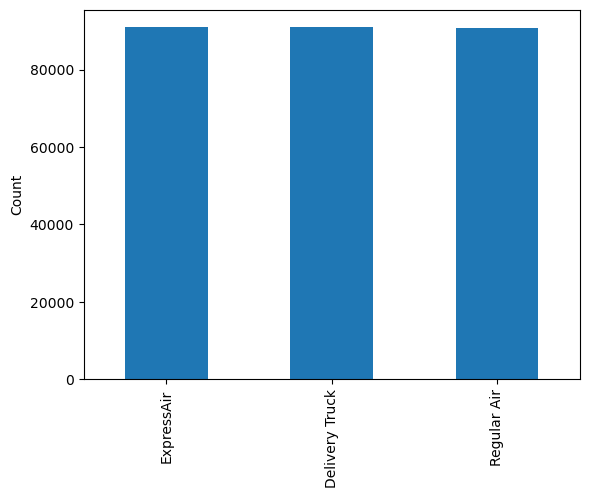

In [128]:
df_rec_sys_order['ShipMode'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.show()

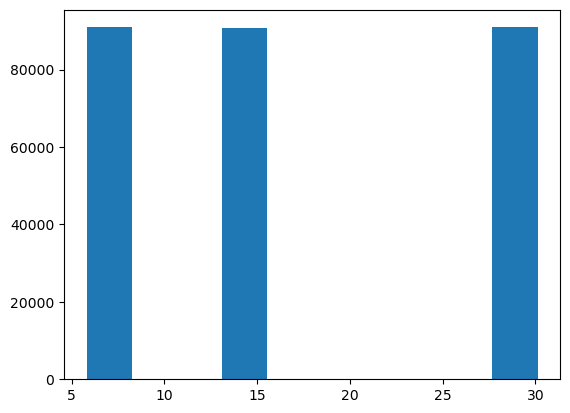

In [110]:
plt.hist(df_rec_sys_order['ShippingCost'], bins=10)
plt.show()

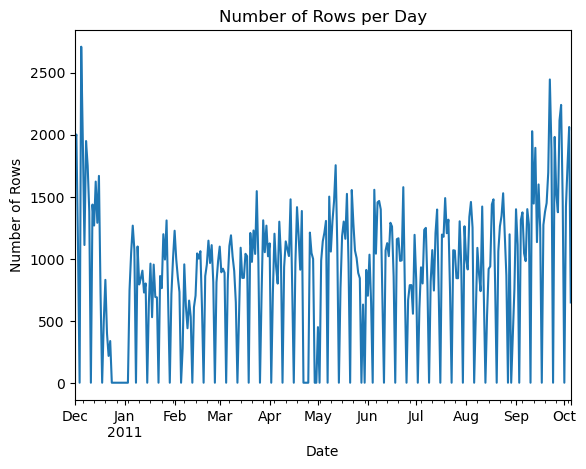

In [113]:
# Group the data by day and count the number of rows for each day
counts = df_rec_sys_order.groupby(pd.Grouper(key='InvoiceDate', freq='D')).size()

# Create a line plot of the daily counts
counts.plot(kind='line')

# Set the title and axis labels
plt.title('Number of Rows per Day')
plt.xlabel('Date')
plt.ylabel('Number of Rows')

# Display the plot
plt.show()

In [119]:
# Check if the date column is in chronological order
is_chronological = df_rec_sys_order['InvoiceDate'].is_monotonic_increasing

if is_chronological:
    print('The date column is in chronological order')
else:
    print('The date column is not in chronological order')

The date column is in chronological order


In [118]:
df_rec_sys_order = df_rec_sys_order.sort_values(by='InvoiceDate')

# Reset the index to reflect the new order
df_rec_sys_order = df_rec_sys_order.reset_index(drop=True)

## Split

In [120]:
from recommenders.datasets.python_splitters import python_chrono_split


In [121]:
train, test = python_chrono_split(df_rec_sys_order, ratio=0.8, filter_by='user', min_rating=10, col_user='CustomerID', col_item='StockCode', col_timestamp='InvoiceDate')

In [122]:
# Print the number of users and items in the training and test sets
print(f'Before Split: {df_rec_sys_order.CustomerID.nunique()} users, {df_rec_sys_order.StockCode.nunique()} items')
print(f'Train: {train.CustomerID.nunique()} users, {train.StockCode.nunique()} items')
print(f'Test: {test.CustomerID.nunique()} users, {test.StockCode.nunique()} items')

Before Split: 3647 users, 3538 items
Train: 3106 users, 3460 items
Test: 3106 users, 2974 items


In [123]:
train.shape

(215671, 9)

In [124]:
test.shape

(53931, 9)

In [125]:
train.tail()

,InvoiceNo,StockCode,Quantity,InvoiceDate,DeliveryDate,Discount%,ShipMode,ShippingCost,CustomerID
137314,554065,85039B,12,2011-05-22 10:39:00,2011-05-24 10:39:00,0.06,Regular Air,15.22,18287
137315,554065,22753,12,2011-05-22 10:39:00,2011-05-24 10:39:00,0.34,Regular Air,15.22,18287
137316,554065,21382,18,2011-05-22 10:39:00,2011-05-25 10:39:00,0.33,Delivery Truck,5.81,18287
137317,554065,22807,6,2011-05-22 10:39:00,2011-05-23 10:39:00,0.41,ExpressAir,30.12,18287
137313,554065,21232,12,2011-05-22 10:39:00,2011-05-25 10:39:00,0.09,Delivery Truck,5.81,18287


In [126]:
test.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,DeliveryDate,Discount%,ShipMode,ShippingCost,CustomerID
153933,556201,22371,8,2011-06-09 13:01:00,2011-06-12 13:01:00,0.42,Delivery Truck,5.81,12347
153932,556201,23170,12,2011-06-09 13:01:00,2011-06-11 13:01:00,0.24,Regular Air,15.22,12347
153939,556201,23162,8,2011-06-09 13:01:00,2011-06-11 13:01:00,0.28,Regular Air,15.22,12347
200496,562032,84992,24,2011-08-02 08:48:00,2011-08-04 08:48:00,0.23,Regular Air,15.22,12347
200488,562032,21975,24,2011-08-02 08:48:00,2011-08-03 08:48:00,0.15,ExpressAir,30.12,12347


In [127]:
train.describe(include='number')

,InvoiceNo,Quantity,Discount%,ShippingCost,CustomerID
count,215671.000000,215671.000000,215671.000000,215671.000000,215671.000000
mean,551520.718664,12.830598,0.299841,17.043698,15283.351804
std,9079.135256,40.434055,0.176170,10.013885,1714.707673
min,536365.000000,1.000000,0.000000,5.810000,12347.000000
25%,544065.000000,2.000000,0.150000,5.810000,13893.000000
50%,550974.000000,6.000000,0.300000,15.220000,15152.000000
75%,558813.000000,12.000000,0.450000,30.120000,16782.000000
max,569590.000000,3114.000000,0.600000,30.120000,18287.000000


In [92]:
train.describe(exclude='number')

2023-02-22 11:27:15,195 [7305] WARNING  py.warnings:109: [JupyterRequire] /var/folders/bs/ht_t1wp94tl3wt5xhchcxq2m0000gn/T/ipykernel_7305/102825196.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  train.describe(exclude='number')

2023-02-22 11:27:15,207 [7305] WARNING  py.warnings:109: [JupyterRequire] /var/folders/bs/ht_t1wp94tl3wt5xhchcxq2m0000gn/T/ipykernel_7305/102825196.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  train.describe(exclude='number')



,StockCode,InvoiceDate,DeliveryDate,ShipMode
count,215671,215671,215671,215671
unique,3465,10427,26776,3
top,85123A,2011-09-21 14:40:00,2011-09-23 14:40:00,Delivery Truck
freq,1310,421,153,71991
first,NaN,2010-12-01 08:26:00,2010-12-02 08:26:00,NaN
last,NaN,2011-10-05 11:25:00,2011-10-08 11:06:00,NaN


In [94]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215671 entries, 10537 to 137313
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     215671 non-null  int64         
 1   StockCode     215671 non-null  object        
 2   Quantity      215671 non-null  int64         
 3   InvoiceDate   215671 non-null  datetime64[ns]
 4   DeliveryDate  215671 non-null  datetime64[ns]
 5   Discount%     215671 non-null  float64       
 6   ShipMode      215671 non-null  object        
 7   ShippingCost  215671 non-null  float64       
 8   CustomerID    215671 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(3), object(2)
memory usage: 16.5+ MB
